## Title: HIV/AIDS Prediction using Machine Learning

#Definition of HIV/AIDS:
HIV (Human Immunodeficiency Virus) is a virus that attacks the immune system and can lead to AIDS (Acquired Immunodeficiency Syndrome). AIDS is a condition characterized by a severely weakened immune system, making individuals more susceptible to infections and certain cancers.

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


## Problem Definition:
The project aims to predict the likelihood of an individual contracting HIV/AIDS using machine learning techniques. This involves classification to categorize individuals into HIV-positive or HIV-negative groups, regression to predict the progression of the disease, and clustering to identify patterns in the data.


In [48]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Data:
- Sources: The data will be sourced from a publicly available dataset containing information such as age, gender, sexual behavior, drug use, medical history, and other relevant parameters.
- Definition of Parameters: Parameters may include age, gender, sexual orientation, number of sexual partners, condom usage, drug use history, CD4 cell count, viral load, etc.
- Talking to Experts: Consulting healthcare professionals and data scientists to understand the significance of each parameter in predicting HIV/AIDS risk

In [3]:
df = pd.read_csv("HIV_dataset (1).csv")

In [4]:
df.head(10)

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
5,15,UNMARRIED,YES,Junior High School,NO,NO,Public bath,Bisexual,NO,NEGATIVE
6,15,UNMARRIED,YES,Junior High School,NO,NO,Public Bath,Heterosexual,YES,NEGATIVE
7,15,UNMARRIED,NO,Junior High School,YES,NO,Public Bath,Bisexual,NO,POSITIVE
8,15,UNMARRIED,YES,Junior High School,YES,YES,Internet,Heterosexual,YES,POSITIVE
9,15,UNMARRIED,NO,Junior High School,NO,NO,Others,Heterosexual,NO,NEGATIVE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  676 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [6]:
df.isnull().sum()

Age                                0
Marital Staus                      0
STD                                0
Educational Background             0
HIV TEST IN PAST YEAR              0
AIDS education                     0
Places of seeking sex partners    22
SEXUAL ORIENTATION                 0
Drug- taking                       0
Result                             0
dtype: int64

## Evaluation:
The model's performance will be evaluated using metrics such as accuracy, sensitivity, specificity, precision, recall, F1 score, and ROC-AUC to assess its predictive capability and generalization to unseen data.

In [7]:
def apply_result(text: str):
    if text.lower() == "positive":
        return "Positive"
    else:
        return "Negative"

In [8]:
df["Result"] = df["Result"].apply(apply_result)

<Axes: xlabel='Result', ylabel='count'>

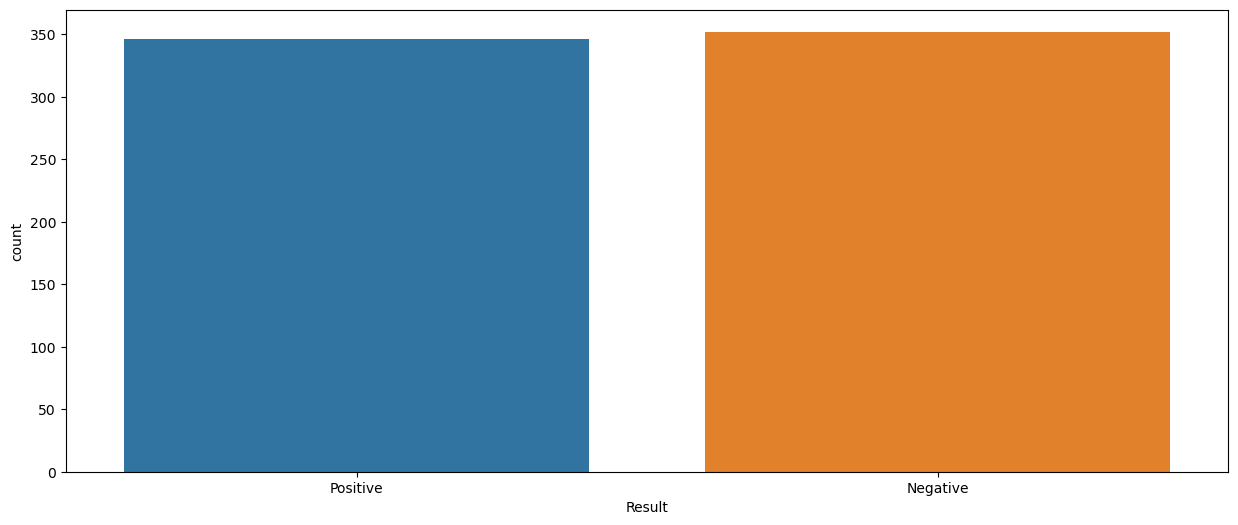

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result")

In [11]:
def apply_std(text: str):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

In [12]:
df["STD"] = df["STD"].apply(apply_std)

<Axes: xlabel='Result', ylabel='count'>

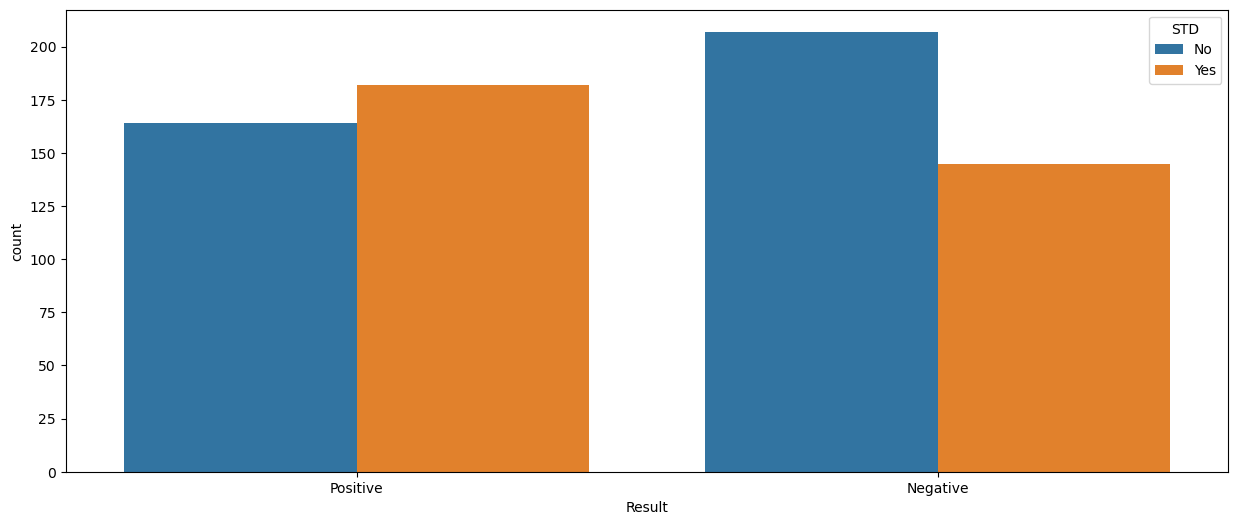

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="STD")

<Axes: xlabel='Result', ylabel='count'>

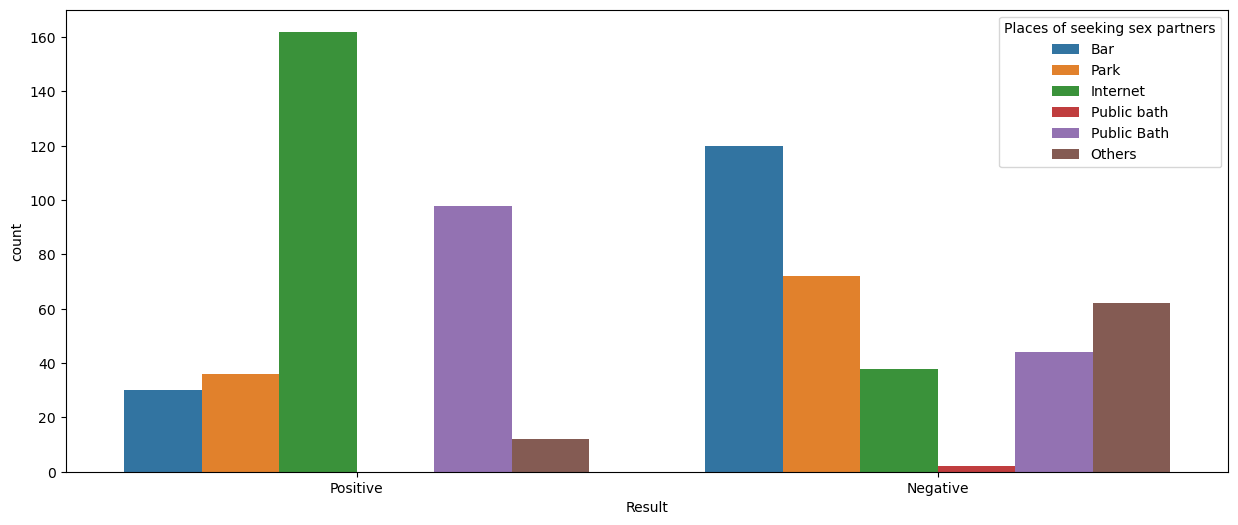

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="Places of seeking sex partners")

In [15]:
def apply_ori(text: str):
    if text.lower() == "bisexual":
        return "Bisexual"
    else:
        return text

In [16]:
df["SEXUAL ORIENTATION"] = df["SEXUAL ORIENTATION"].apply(apply_ori)

<Axes: xlabel='Result', ylabel='count'>

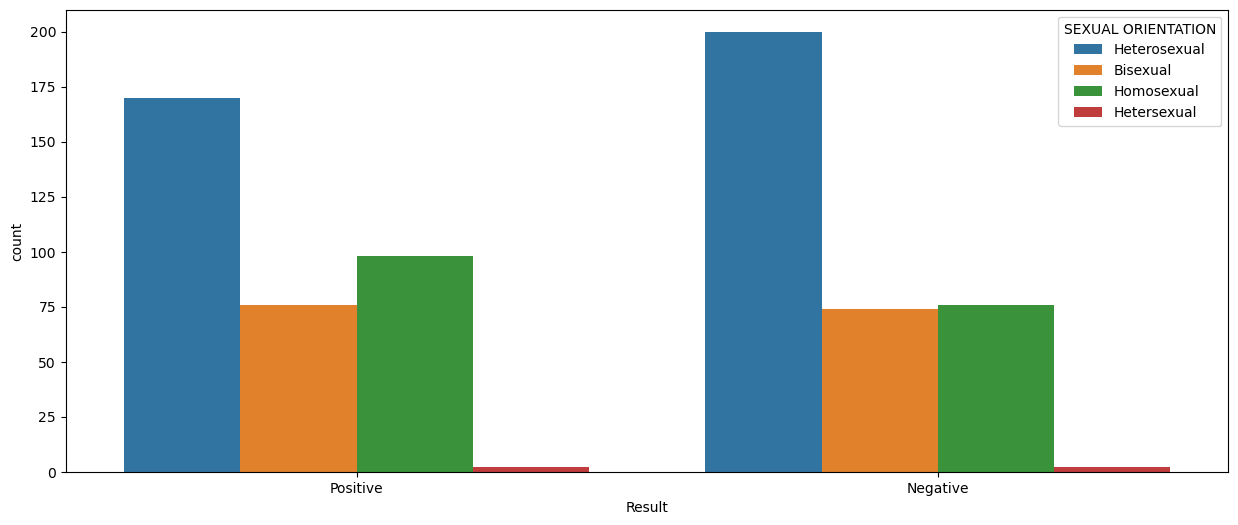

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="SEXUAL ORIENTATION")

In [18]:
def apply_aids(text: str):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

In [19]:
df["AIDS education"] = df["AIDS education"].apply(apply_aids)

<Axes: xlabel='Result', ylabel='count'>

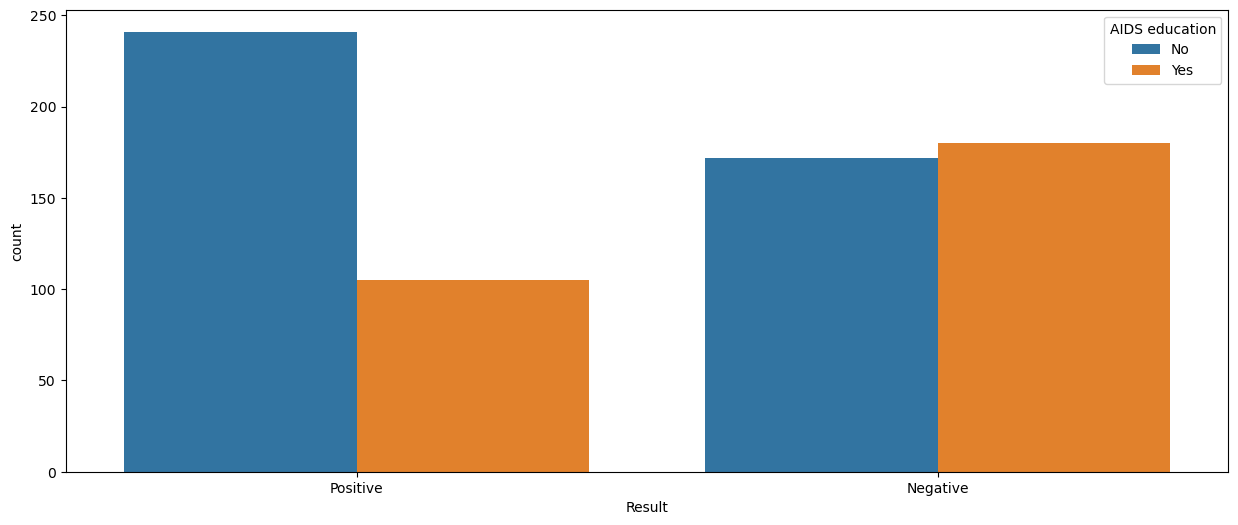

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="AIDS education")

##5. Features:
Key features for predicting HIV/AIDS risk may include age, gender, sexual behavior, drug use history, CD4 cell count, viral load, presence of other sexually transmitted infections (STIs), and geographic location.

In [19]:
def apply_edu(text: str):
    if text == "College Dregree":
        return "College Degree"
    else:
        return text

In [20]:
df["Educational Background"] = df["Educational Background"].apply(apply_edu)

<Axes: xlabel='Result', ylabel='count'>

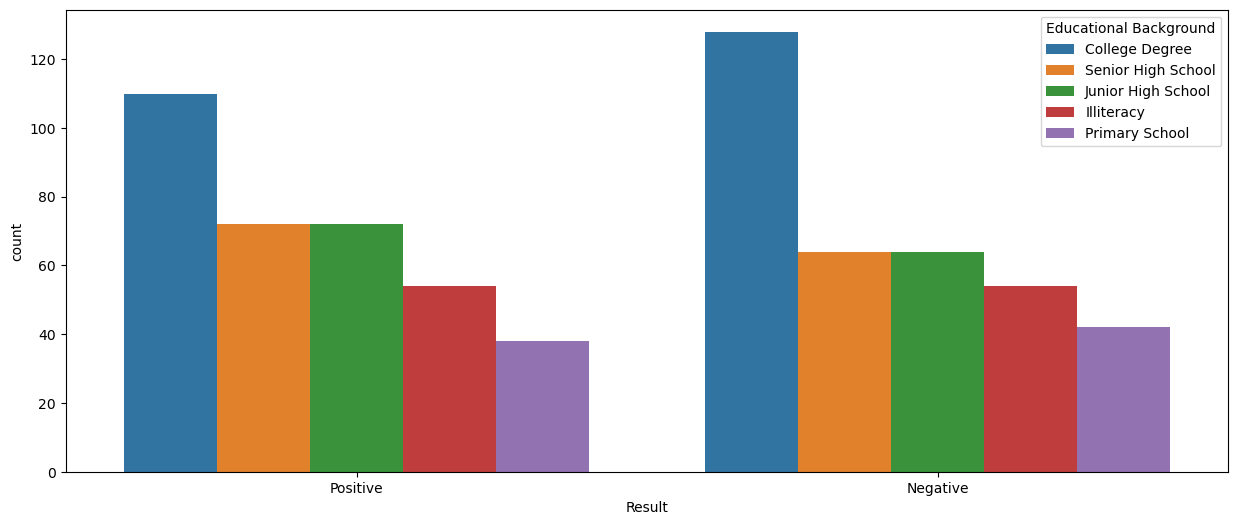

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="Educational Background")

In [22]:
def apply_sts(text: str):
    if text.lower() == "married":
        return "Married"
    elif text.lower() == "divorced":
        return "Divorced"
    else:
        return text

In [23]:
df["Marital Staus"] = df["Marital Staus"].apply(apply_sts)

<Axes: xlabel='Result', ylabel='count'>

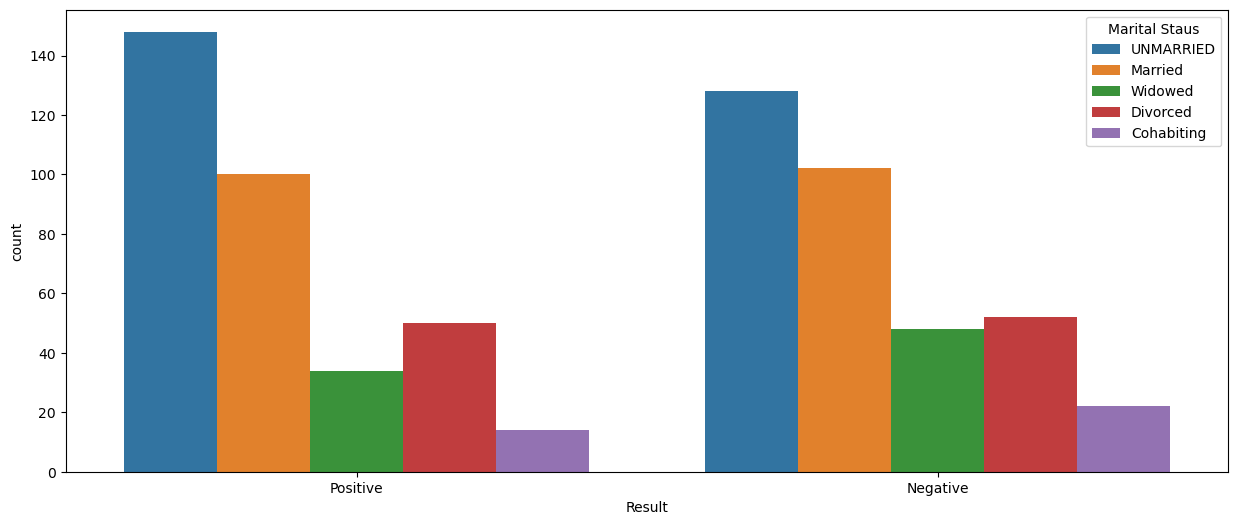

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="Marital Staus")

In [25]:
def apply_drg(text: str):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

In [26]:
df["Drug- taking"] = df["Drug- taking"].apply(apply_drg)

<Axes: xlabel='Result', ylabel='count'>

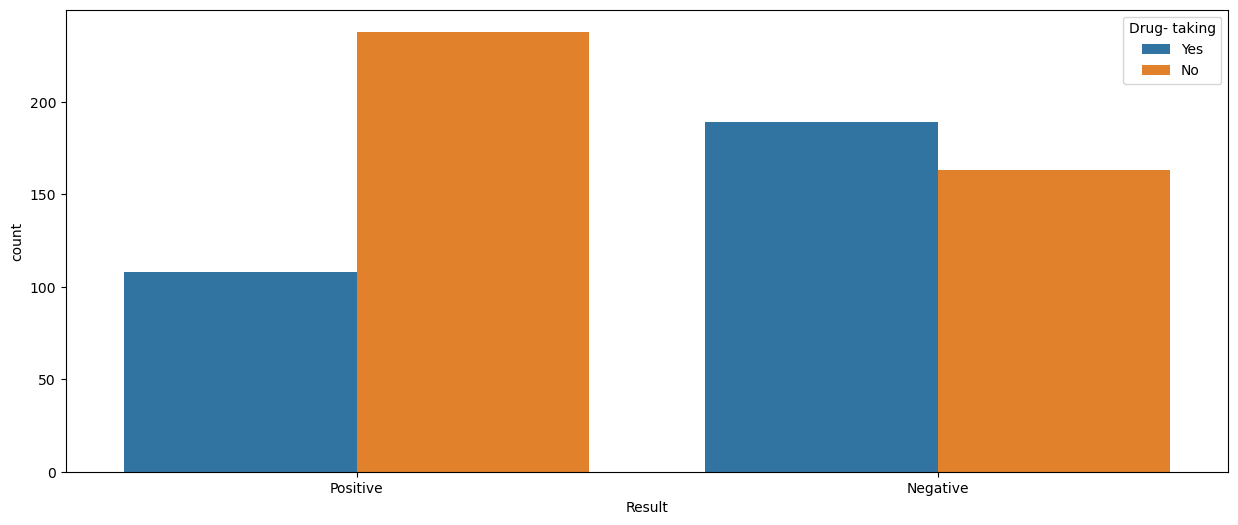

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="Drug- taking")

In [28]:
def apply_test(text: str):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

In [29]:
df["HIV TEST IN PAST YEAR"] = df["HIV TEST IN PAST YEAR"].apply(apply_test)

<Axes: xlabel='Result', ylabel='count'>

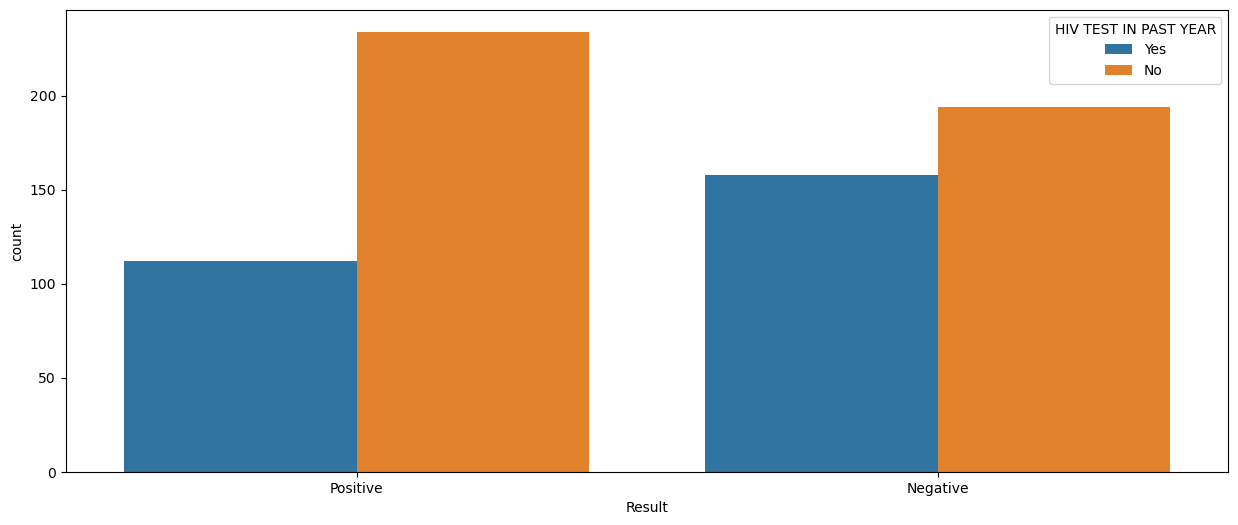

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="HIV TEST IN PAST YEAR")

<Figure size 1500x600 with 0 Axes>

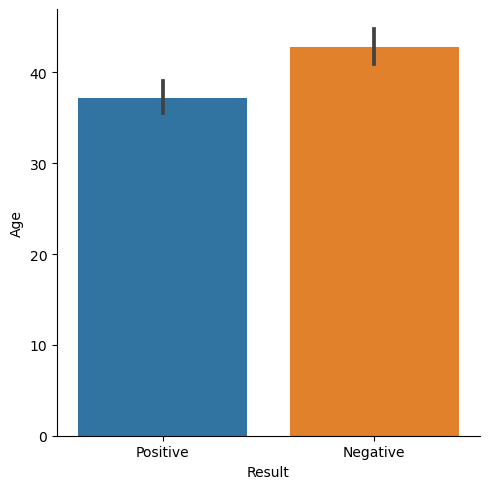

In [21]:
plt.figure(figsize=(15,6))
sns.catplot(data=df, kind="bar", x="Result", y="Age")

## Data Preprocessing

In [22]:
# Splitting the data to Numerical Features and Categorical Features
num_features = list(df.select_dtypes('number'))
# num_features.remove('Price')

nom_features = list(df.select_dtypes('object'))
nom_features.remove('Result')

# ord_features = ['Owner_Type']

print(f'The Numerical Features: {num_features}')
print(f'The Nominal Features: {nom_features}')
# print(f'The Ordinal Features: {ord_features}')

The Numerical Features: ['Age']
The Nominal Features: ['Marital Staus', 'STD', 'Educational Background', 'HIV TEST IN PAST YEAR', 'AIDS education', 'Places of seeking sex partners', 'SEXUAL ORIENTATION', 'Drug- taking']


In [23]:
from sklearn.model_selection import train_test_split
X = df.drop("Result", axis=1)
y = df['Result'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42)

In [24]:
X_train.head()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking
82,34,UNMARRIED,No,College Degree,NO,Yes,Bar,Bisexual,NO
51,37,Divorced,No,Junior High School,NO,No,Internet,Bisexual,NO
220,75,MARRIED,Yes,Illiteracy,NO,No,Bar,Heterosexual,YES
559,75,MARRIED,No,Senior High School,YES,No,Park,Bisexual,NO
544,54,UNMARRIED,No,College Dregree,NO,Yes,NaN,Heterosexual,YES


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [26]:
# numerical pipeline
num_pipeline = make_pipeline(
                             StandardScaler()
                            )

nom_pipeline = make_pipeline(
                             OneHotEncoder()
                            )

preprocessor = ColumnTransformer([
                                  ('numerical', num_pipeline, num_features), 
                                  ('nominal', nom_pipeline, nom_features),
                                ])
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Marital Staus', 'STD',
                                  'Educational Background',
                                  'HIV TEST IN PAST YEAR', 'AIDS education',
                                  'Places of seeking sex partners',
                                  'SEXUAL ORIENTATION', 'Drug- taking'])])

In [27]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [29]:
y_test

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1])

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [31]:
predictions = rf.predict(X_test_transformed)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.96      0.99      0.97        75

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [33]:
import joblib

In [34]:
joblib.dump(rf, "amant_ass.pkl")

['amant_ass.pkl']

In [35]:
joblib.dump(preprocessor, "processor.pkl")

['processor.pkl']